In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = (10,5)
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',150)
import sys,os
import json
import numpy as np

In [3]:
data = pd.read_csv('spot_check_data.csv.bz2')

In [4]:
#1. How many words are present in title? Analyse the distribution of no of words in title
pd.Series(map(lambda x: np.array(str(x).split(' ')).size ,data.title)).value_counts()

5      1120
6      1110
7      1088
4      1048
8       849
9       656
3       655
10      460
11      330
2       314
12      200
13      140
14       95
1        94
15       68
17       45
16       34
19       32
18       31
21       12
20       10
22       10
26        9
27        9
23        9
28        5
24        4
73        4
64        4
29        4
25        3
34        3
39        3
45        3
31        2
60        2
52        2
186       2
92        2
30        2
44        2
42        2
38        1
33        1
37        1
47        1
dtype: int64

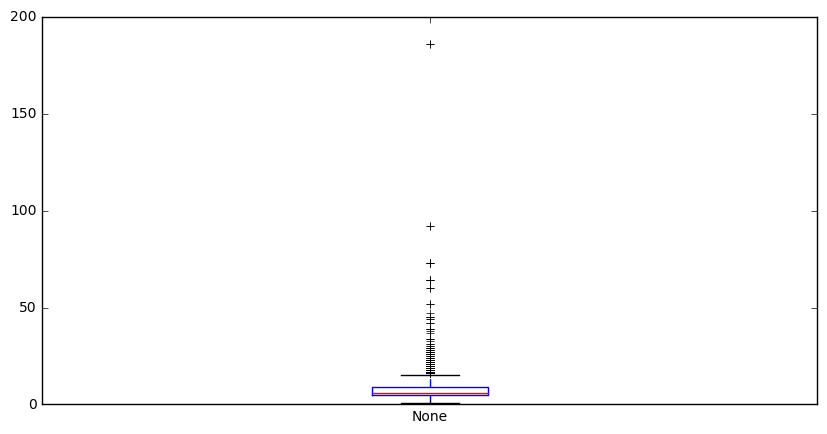

In [5]:
#1. Visualization
pd.Series(map(lambda x: np.array(str(x).split(' ')).size ,data.title)).plot(kind="box")

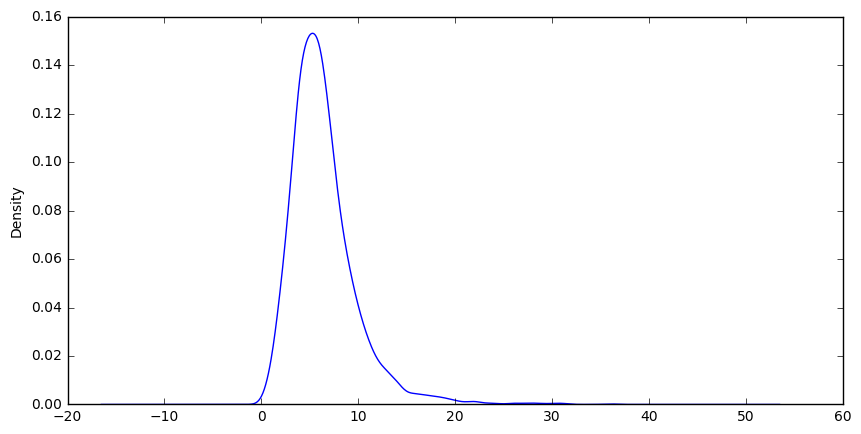

In [6]:
#2. How many words are present in breadcrumbs? Analyse the distribution of no of words in breadcrumbs
import re
unique_breadcrumbs = set(filter(lambda x: type(x) is str, data.breadCrumbs))
pd.Series(map(lambda x: len(re.findall(r"[\w']+", x)), unique_breadcrumbs)).plot(kind="kde")

In [10]:
#3. How many samples did we misclassify in total?
misclassified_count = (data.categoryNamePath_status == "Incorrect").tolist().count(True)
misclassified_count

1595

In [11]:
#4. What is probability of misclassifying a sample?
float((misclassified_count))/(data.categoryNamePath_status.count())

0.2408274195983693

In [12]:
#5. How many samples are misclassified when the breadcrumbs are invalid
data[(data.categoryNamePath_status == "Incorrect") & (data.breadCrumbs_status != "Correct")]['categoryNamePath_status'].count()

694

In [13]:
#6. What is the probability that breadcrumbs are invalid    
invalid_breadcrumbs = data[(data.breadCrumbs_status != "Correct")]['breadCrumbs_status'].count() #2283
float(invalid_breadcrumbs) / data.breadCrumbs_status.count()

0.34470783632794805

In [14]:
#7. What is the probability of correct category given the breadcrumb is invalid
correct_category = data[(data.categoryNamePath_status == "Correct") & (data.breadCrumbs_status != "Correct")]['categoryNamePath_status'].count()
float(correct_category)/invalid_breadcrumbs

0.6955759964958388

In [22]:
#8. Which toplevel category contains most invalid breadcrumbs
#Yet to complete
top_level_categories = map(lambda x: x.split(">")[0], data.categoryNamePath)

In [15]:
data.breadCrumbs_status.value_counts()

Correct       4340
Notpresent    1245
Incorrect      747
Missed         291
Name: breadCrumbs_status, dtype: int64